# 데이터 전처리 과제
## 이동훈

# 1

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

age = [20,25,27,32,45,49,52,57,60,62]
fat = [7,8,11,20,15,35,40,28,31,19]
df = pd.DataFrame({'age' : age,'fat' : fat})
arr = df.values[:,:]
age = arr[:,0]
fat = arr[:,1]

## 1.1

In [31]:
print(f'age 평균 : {np.mean(age)}')
print(f'age 표준편차 : {np.std(age): .2f}')
print(f'age 중앙값 : {np.median(age)}')
print(f'fat 평균 : {np.mean(fat)}')
print(f'fat 표준편차 : {np.std(fat): .2f}')
print(f'fat 중앙값 : {np.median(fat)}')

age 평균 : 42.9
age 표준편차 :  14.82
age 중앙값 : 47.0
fat 평균 : 21.4
fat 표준편차 :  11.00
fat 중앙값 : 19.5


## 1.2

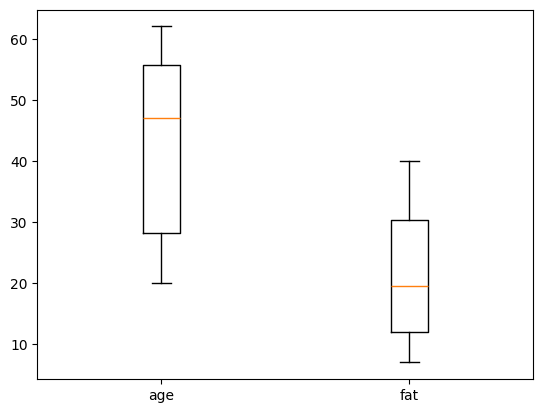

In [37]:
plt.boxplot(arr, labels = df.columns)
plt.show()

## 1.3

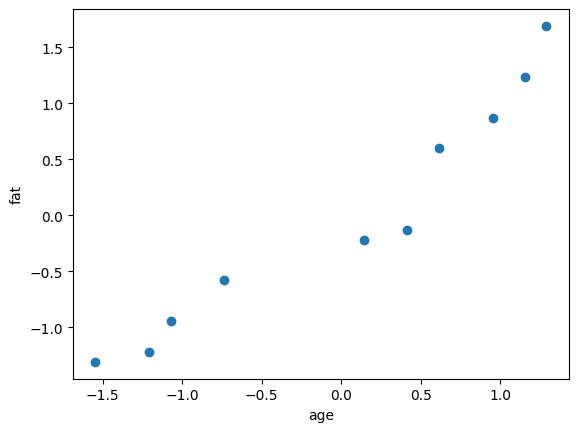

In [36]:
plt.scatter(age, fat)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.show()

## 1.4

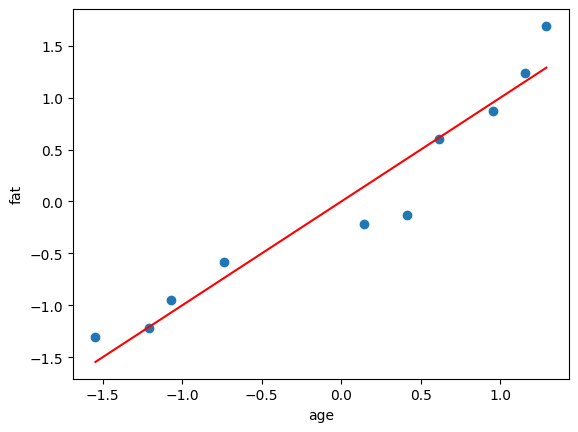

In [35]:
age = np.sort((age - np.mean(age))/np.std(age))
fat = np.sort((fat - np.mean(fat))/np.std(fat))

line = np.linspace(age.min(), age.max(), 50)
plt.plot(line, line, c = 'r')
plt.scatter(age,fat)
plt.xlabel('age')
plt.ylabel('fat')
plt.show()

# 2

## 2.1  
Nominal attribute : 명목형 속성이며, 범주형 속성이라 각 값의 대소 관계는 의미가 없다.

## 2.2
Numeric attribute : 숫자 속성이며, 두 수의 대소 관계를 비교하고 정량화 할 수 있다.

## 2.3
Ordinal attribute : 순서 속성이며, 의미 있는 순서나 순위를 가질 수 있는 값 

## 2.4
Binary attribute : 이진 속성이며, 0과 1의 두가지 상태를 가지는 속성

# 3

In [ ]:
import numpy as np

def minco(p1,p2,no) :
	res = []
	for i in range(len(p1)) :
		res.append((np.abs(p1[i]-p2[i]))**no)
	
	return round(sum(res)**(1/no),2)

In [ ]:
a = [22,1,42,10]
b = [20,0,36,8]

## 3.1 Euclidean distance

In [ ]:
minco(a,b,2)

6.71

## 3.2 Manhattan distance

In [ ]:
minco(a,b,1)

11.0

## 3.3 Minkowski distance

In [ ]:
minco(a,b,3)

6.15

# 4

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

df = pd.DataFrame({'test-1':['code A','code B','code C','code D'],
                   'test-2':['excellent','fair','good','excellent'],
                   'test-3':[45,22,64,28]})

x = df.values[:,:]
encoder = OrdinalEncoder(categories = [['fair','good','excellent']])
x[:,[1]] = encoder.fit_transform(x[:,[1]])

In [11]:
def nominal_dist(x,y) :
    if x == y :
        return 0
    else : 
        return 1
    
def numeric_dist(x,y,min,max):
    return np.abs(x-y)/(max-min)

def ordinal_dist(x,y,mf) :
    xm = x/mf
    ym = y/mf
    return numeric_dist(xm,ym, 0,1)


def mixed_dist(x,y) :
    p = 0
    q = 0
    for f in range(len(types)) :
        q += 1
        if types[f] == 'ordinal' :
            p += ordinal_dist(x[f], y[f], maxs[f])
        elif types[f] == 'numeric' :
            p += numeric_dist(x[f], y[f], mins[f], maxs[f])
        else :
            p += nominal_dist(x[f],y[f])
    return p/q

In [14]:
mins = x.min(axis = 0)
maxs = x.max(axis = 0)
types = ('nominal', 'ordinal','numeric')

round(mixed_dist(x[0,:],x[2,:]),4)

0.6508

# 5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('./datasets/iris.csv')
x = df.values[:,0]
y = df.values[:,1]

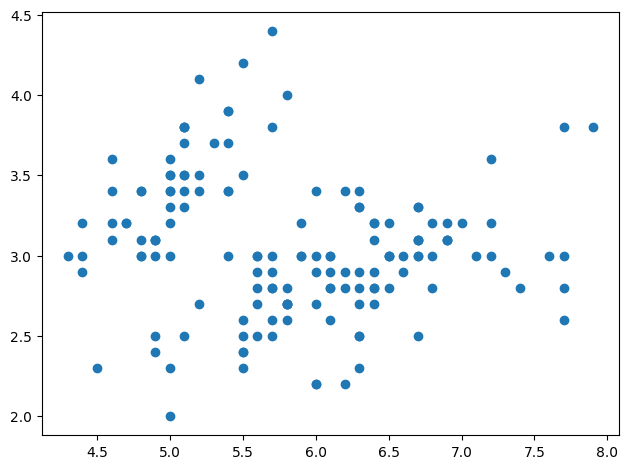

In [ ]:
plt.scatter(x,y)
plt.tight_layout()
plt.show()

# 6

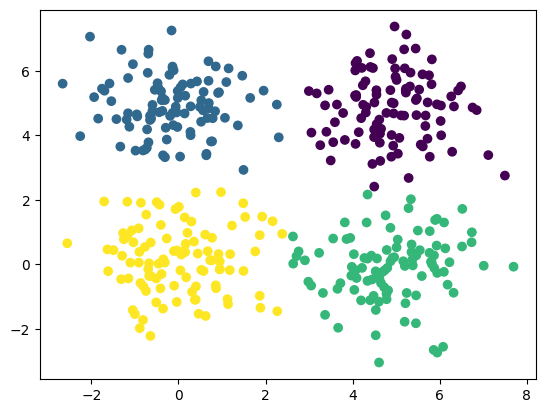

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

def kmeans(data, init_centroids, num_iters):  
	k = init_centroids.shape[0] 
	centroids = init_centroids 
	for _ in range(num_iters):  # 100 번 center align 하자
		assigned_centroids = get_closest_centroid_i(data, centroids) 
		centroids = compute_centroids(k, data, assigned_centroids) 
	return centroids, assigned_centroids 


#----------------------------answer-------------------------------------
def get_closest_centroid_i(data, centroids) :
	n = data.shape[0]
	c_n = centroids.shape[0]
	data = data.reshape(n,1,2)
	centroids = centroids.reshape(1,c_n,2)
	dist = np.sqrt(np.sum(np.power(data-centroids,2), axis = -1))
	return np.argmin(dist, axis = -1)

def compute_centroids(k,data, assigned_centroids) :
	new_centroids = np.zeros((k, data.shape[1]))
	for i in range(k) :
		new_centroids[i,:] = np.mean(data[assigned_centroids == i], axis =0 )
	return new_centroids
#-----------------------------------------------------------------------


n = 100 
cov = [[1.0, 0.0], [0.0, 1.0]] 
np.random.seed(0) 
data1 = np.random.multivariate_normal((0.0, 0.0), cov, size=n) 
data2 = np.random.multivariate_normal((0.0, 5.0), cov, size=n) 
data3 = np.random.multivariate_normal((5.0, 0.0), cov, size=n) 
data4 = np.random.multivariate_normal((5.0, 5.0), cov, size=n) 
data = np.concatenate((data1, data2, data3, data4), axis=0) 
np.random.shuffle(data) 

num_iters = 100 
k = 4 
init_centroids = data[:k]  #임의의 4개 center 설정

centroids, c_i = kmeans(data, init_centroids, num_iters) 
plt.scatter(data[:, 0], data[:, 1], c=c_i) 
plt.show()
